In [55]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [56]:
# setting the User-Agent header is important for web scraping to avoid detection and blocking by websites
headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }

In [57]:
url = 'https://www.imdb.com/chart/top/'

In [58]:
page = requests.get(url, headers=headers)

In [59]:
# page.content

In [60]:
soup = BeautifulSoup(page.content, "html.parser")

In [61]:
scraped_movies = soup.find_all('div', class_='ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b0691f29-9 klOwFB cli-title')
# scraped_movies

In [62]:
movies = []
for movie in scraped_movies:
    movie = movie.get_text().replace('\n', "")
    movie = movie.strip(" ")
    movies.append(movie)
# movies

In [63]:
scraped_ratings = soup.find_all('span', class_= 'sc-b0691f29-1 grHDBY')

In [64]:
ratings = []
for rating in scraped_ratings:
    rating = rating.get_text()[:3]
    ratings.append(rating)
# ratings

In [65]:
scraped_voting = soup.find_all('span', class_= 'ipc-rating-star--voteCount')
votings = []
for voting in scraped_voting:
    voting = voting.get_text()[2:7:1].replace(')',"")
    voting = voting.replace('M','')
    voting = voting.replace('K','')
    votings.append(voting)
# votings
# for voting in scraped_voting:
#     numeric_part = re.search(r'\d+', voting.get_text()).group()
#     votings.append(int(numeric_part))

In [66]:
scraped_year = soup.find_all('span', class_= 'sc-b0691f29-8 ilsLEX cli-title-metadata-item')
years = []
for year in scraped_year:
    text = year.get_text()
    match = re.search(r'\b(19|20)\d{2}\b', text)
    if match:
        years.append(match.group())
# years

In [67]:
# scraped_duration = soup.find_all('span', class_="sc-b0691f29-8 ilsLEX cli-title-metadata-item")
# durations = []
# for duration in scraped_duration:
#     text = duration.get_text()
#     match = re.search(r'\b([0-9]+)h ([0-9]+)m\b', text)
#     if match:
#         durations.append(match.group())
# # durations

In [68]:
data = pd.DataFrame()
data['Movie Names'] = movies
data['Ratings'] = ratings
data['Votings'] = votings
data['Release Year'] = years
# data['Duration'] = pd.Series(durations)
data.head()
# print(data)

,Movie Names,Ratings,Votings,Release Year
0,1. The Shawshank Redemption,9.3,2.9,1994
1,2. The Godfather,9.2,2,1972
2,3. The Dark Knight,9.0,2.9,2008
3,4. The Godfather: Part II,9.0,1.4,1974
4,5. 12 Angry Men,9.0,862,1957


In [69]:
data.to_csv('D:/Movies Info Scrapping/IMDB Top Movies.csv', index=False)
print("File saved successfully")

File saved successfully


### Data Cleaning

In [70]:
data['Ratings'] = data['Ratings'].astype(float)
data['Votings'] = data['Votings'].astype(float)
data['Release Year'] = pd.to_numeric(data['Release Year'], errors='coerce')
data = data.dropna()
data.head()

,Movie Names,Ratings,Votings,Release Year
0,1. The Shawshank Redemption,9.3,2.9,1994
1,2. The Godfather,9.2,2.0,1972
2,3. The Dark Knight,9.0,2.9,2008
3,4. The Godfather: Part II,9.0,1.4,1974
4,5. 12 Angry Men,9.0,862.0,1957


In [71]:
data.to_csv('D:/Movies Info Scrapping/IMDB Top Movies.csv', index=False)
print("File saved successfully")

File saved successfully


## Data Analysis and Visualization

### Distribution of Votings

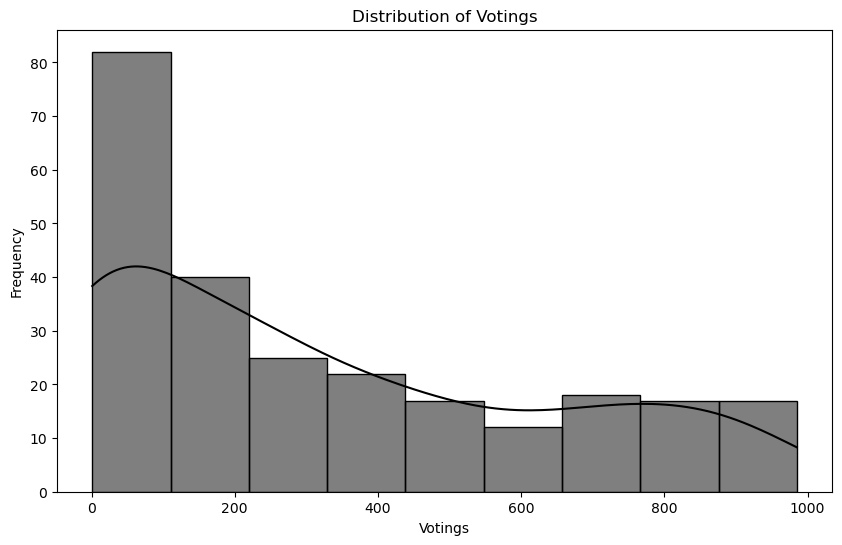

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Votings'], kde=True, color='black')
plt.title('Distribution of Votings')
plt.xlabel('Votings')
plt.ylabel('Frequency')
plt.show()

In [73]:
# fig = px.histogram(data, x='Votings', nbins=10, title='Distribution of Votings')
# fig.update_layout(xaxis_title='Votings', yaxis_title='Frequency')
# fig.show()

In [74]:
# plt.hist(data['Votings'], bins=10, edgecolor='black')
# plt.title('Distribution of Votings')
# plt.xlabel('Votings')
# plt.ylabel('Frequency')
# plt.show()

### Distribution of Ratings

In [75]:
fig = px.histogram(data, x='Ratings', nbins=100, range_x=[0,10], title='Distribution of Ratings')
fig.update_layout(xaxis_title='Ratings', yaxis_title='Frequency')
fig.show()

In [76]:
# plt.hist(data['Ratings'], bins=10, edgecolor='black')
# plt.title('Distribution of Ratings')
# plt.xlabel('Ratings')
# plt.ylabel('Frequency')
# plt.show()

### Movies by Release Year

In [77]:
fig = px.histogram(data, x='Release Year', nbins=100, title='Movies by Release Year')
fig.update_layout(title="Movies by Release Year",xaxis_title='Release Year', yaxis_title='Frequency')
fig.show()

In [78]:
# plt.hist(data['Release Year'], bins=100, edgecolor='black')
# plt.title('Movies by Release Year')
# plt.xlabel('Release Year')
# plt.ylabel('Frequency')
# plt.show()

### Interactive Scatter Plot of Ratings vs. Votings

In [79]:
fig = px.scatter(data, x='Ratings', y='Movie Names', title='Ratings vs. Votings')
fig.update_layout(xaxis_title='Ratings', yaxis_title='Movies')
fig.show()

### 3D Scatter Plot of Ratings vs. Votings vs. Release Year

In [80]:
fig = go.Figure(data=[go.Scatter3d(x=data['Ratings'], y=data['Movie Names'], z=data['Release Year'], mode='markers', 
                                   marker=dict(size=5, color='red', opacity=0.8))])
fig.update_layout(title='Ratings vs. Movie Name vs. Release Year', 
                  scene=dict(xaxis_title='Ratings', yaxis_title='Votings', zaxis_title='Release Year'))
fig.show()

In the for loop where we extract the movie titles, we use the replace() method to remove any newline characters and leading/trailing whitespace from the text.
In the for loop where we extract the ratings, we use slicing to extract only the first three characters (i.e., the rating value) from the text.
In the for loop where we extract the votings, we use regular expressions to extract the numeric part of the text and convert it to an integer.
In the for loop where we extract the release years, we use regular expressions to extract the four-digit year value from the text.
In the seaborn histogram of the votings, we use the kde=True argument to plot a kernel density estimate (KDE) curve along with the histogram.
In the plotly histogram of the ratings, we use the nbins=100 argument to specify the number of bins in the histogram.
In the plotly histogram of the release years, we use the nbins=100 argument to specify the number of bins in the histogram.
In the plotly scatter plot of the ratings vs. votings, we use the title argument to add a title to the plot.
In the plotly 3D scatter plot of the ratings vs. votings vs. release year, we use the scene argument to specify the x, y, and z axis labels.